In [32]:
## Importing pandas

# The convention for importing `pandas` is the following
import pandas as pd

In [33]:
# You can check the version of the library. Because pandas is fast-evolving library, you want to make sure that you have the up-to-date version of the library. 
pd.__version__

'1.5.3'

In [34]:
# You also need `matplotlib`, which is used by `pandas` to plot figures. The following is the most common convention to import `matplotlib` library. 
import matplotlib.pyplot as plt

In [35]:
# Let's check its version too. 
import matplotlib
matplotlib.__version__

'3.7.0'

In [36]:
## Loading a CSV data file

# Using pandas, you can read tabular data files in [many formats and through many protocols](https://pandas.pydata.org/pandas-docs/stable/io.html). Pandas supports not only flat files such as `.csv`, but also various other formats including clipboard, Excel, JSON, HTML, Feather, Parquet, SQL, Google BigQuery, and so on. Moreover, you can pass a local file path or a URL. If it's on Amazon S3, just pass a url like `s3://path/to/file.csv`. If it's on a webpage, then just use `https://some/url.csv`. 

# Let's load a dataset about the location of pumps in the John Snow's map. You can download the file to your computer and try to load it using the local path too. 
import matplotlib
matplotlib.__version__

'3.7.0'

In [37]:
pump_df = pd.read_csv('https://raw.githubusercontent.com/yy/dviz-course/master/data/pumps.csv')
# `df` stands for "[Data Frame](https://pandas.pydata.org/pandas-docs/stable/dsintro.html#dataframe)", which is a fundamental data object in Pandas. You can take a look at the dataset by looking at the first few lines.

pump_df.head() 

,X,Y
0,8.651201,17.891600
1,10.984780,18.517851
2,13.378190,17.394541
3,14.879830,17.809919
4,8.694768,14.905470


In [38]:
# Q1:
# Print first 3 lines
pump_df.head(3) 


,X,Y
0,8.651201,17.891600
1,10.984780,18.517851
2,13.378190,17.394541


In [39]:
# You can also sample several rows randomly. If the data is sorted in some ways, sampling may give you a rather unbiased view of the dataset.  
pump_df.sample(5)

,X,Y
2,13.378190,17.394541
4,8.694768,14.905470
9,16.434891,9.252130
8,13.521460,7.958250
1,10.984780,18.517851


In [40]:
# Now let's load another CSV file that documents the cholera deaths. The URL is https://raw.githubusercontent.com/yy/dviz-course/master/data/deaths.csv

# " **Q2: load the death dataset and inspect it**

# 1. **load this dataset as `death_df`.**
death_df = pd.read_csv('https://raw.githubusercontent.com/yy/dviz-course/master/data/deaths.csv')


In [41]:
# 2. **show the first 2 rows.**
death_df.head(2)

,X,Y
0,13.588010,11.09560
1,9.878124,12.55918


In [42]:
# 3. **show the total number of rows.**
len(death_df)

578

<Axes: >

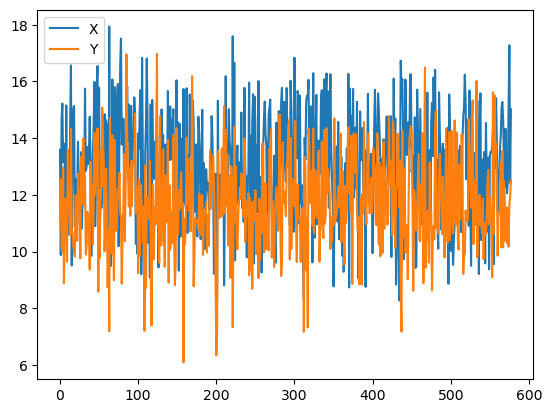

In [43]:
## Some visualizations:

death_df.plot()

In [44]:
%matplotlib inline

<Axes: xlabel='X', ylabel='Y'>

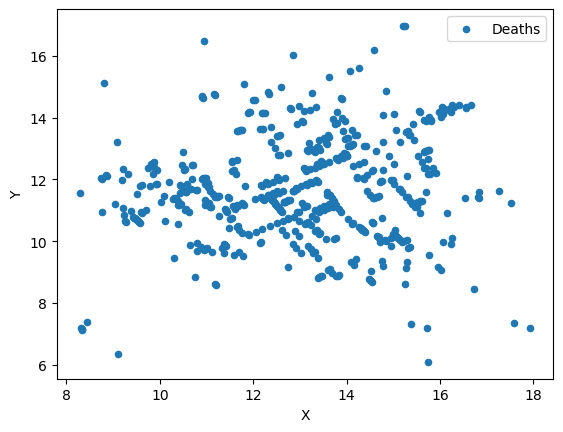

In [45]:
death_df.plot(x='X', y='Y', kind='scatter', label='Deaths')

<Axes: xlabel='X', ylabel='Y'>

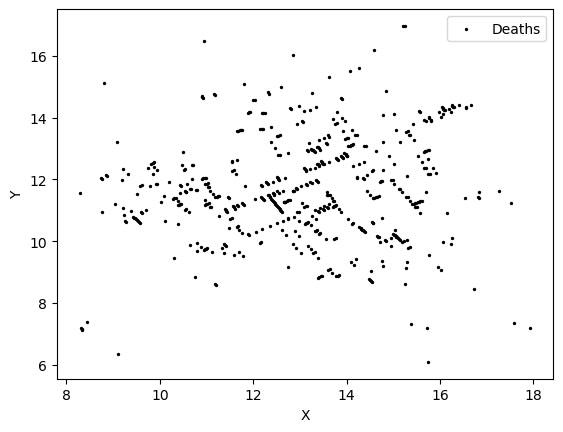

In [46]:
death_df.plot(x='X', y='Y', kind='scatter', label='Deaths', s=2, c='black')

<Axes: xlabel='X', ylabel='Y'>

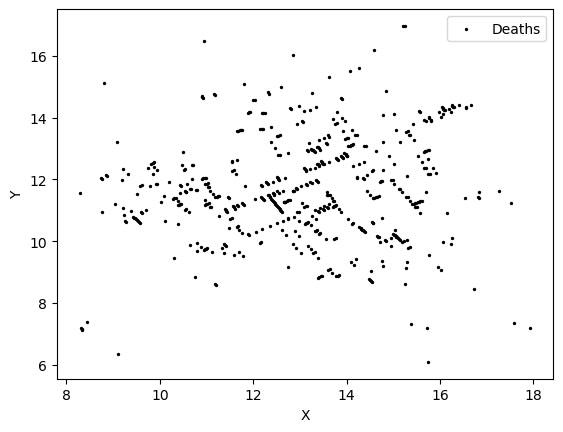

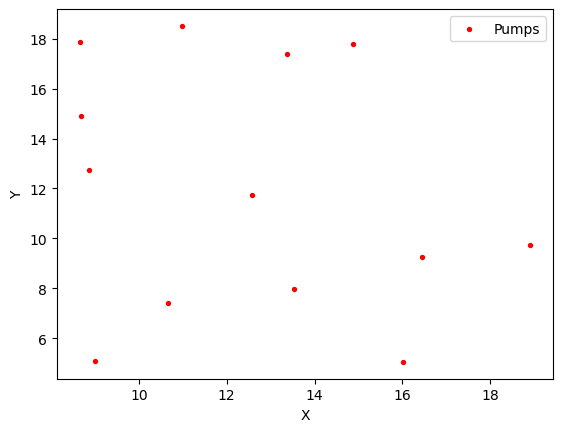

In [47]:
death_df.plot(x='X', y='Y', s=2, c='black', kind='scatter', label='Deaths')
pump_df.plot(x='X', y='Y', kind='scatter', c='red', s=8, label='Pumps')

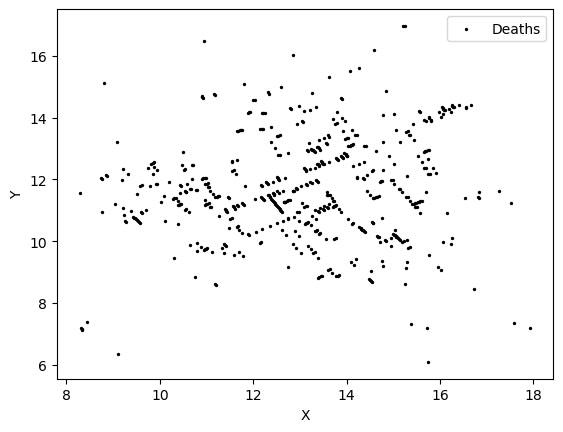

In [48]:
ax = death_df.plot(x='X', y='Y', s=2, c='black', kind='scatter', label='Deaths')

In [49]:

ax

<Axes: xlabel='X', ylabel='Y'>

<Axes: xlabel='X', ylabel='Y'>

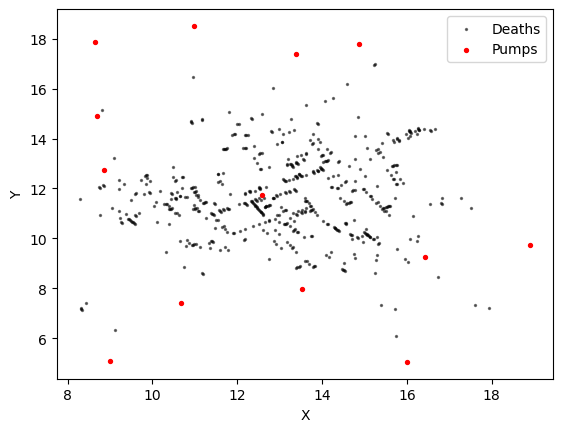

In [50]:
ax = death_df.plot(x='X', y='Y', s=2, c='black', alpha=0.5, kind='scatter', label='Deaths')
pump_df.plot(x='X', y='Y', kind='scatter', c='red', s=8, label='Pumps', ax=ax)

<Axes: xlabel='X', ylabel='Y'>

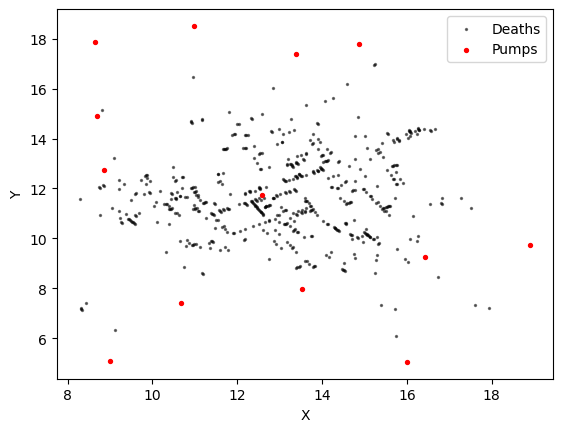

In [51]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
death_df.plot(x='X', y='Y', s=2, c='black', alpha=0.5, kind='scatter', label='Deaths',ax=ax)
pump_df.plot(x='X', y='Y', kind='scatter', c='red', s=8, label='Pumps', ax=ax)

In [52]:
## Voronoi diagram

# Let's try the Voronoi diagram. You can use the `scipy.spatial.Voronoi` and `scipy.spatial.voronoi_plot_2d` from `scipy`, the *scientific python* library. 

# Take a look at the documentation of [Voronoi](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.spatial.Voronoi.html#scipy.spatial.Voronoi) and [voronoi_plot_2d](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.spatial.voronoi_plot_2d.html) and 

# ---------------------------------------------------------
#  **Q3: produce a Voronoi diagram that shows the deaths, pumps, and voronoi cells**
from scipy.spatial import Voronoi, voronoi_plot_2d      # Imports Voronoi functions.
points = pump_df.values                                 # Picking up data for the diagram.
points




                                                     

array([[ 8.6512012, 17.8915997],
       [10.9847803, 18.5178509],
       [13.37819  , 17.3945408],
       [14.8798304, 17.8099194],
       [ 8.694768 , 14.9054699],
       [ 8.8644161, 12.75354  ],
       [12.5713596, 11.72717  ],
       [10.6609697,  7.428647 ],
       [13.5214596,  7.95825  ],
       [16.4348907,  9.2521296],
       [18.9143906,  9.7378187],
       [16.0051098,  5.0468378],
       [ 8.9994402,  5.1010232]])

In [53]:
vor = Voronoi(points)                                   # Creates Voronoi diagram.


In [54]:
plt.show()                                              # Shows the plot.

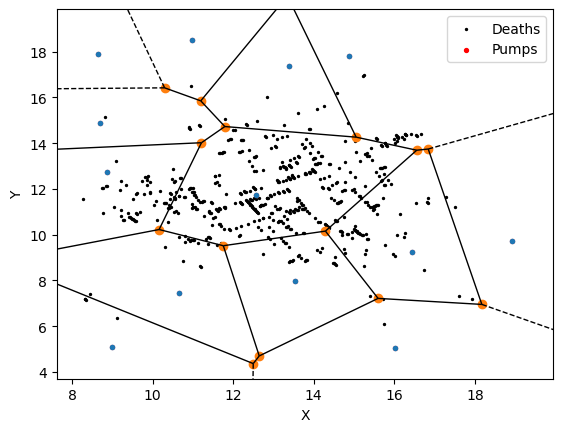

In [55]:
## **Q4: Save your Voronoi diagram. Make sure that your plot contains the scatterplot of deaths & pumps as well as the Voronoi cells**
fig, ax = plt.subplots()                                # Setting up plotting environment.
death_df.plot(x='X', y='Y', s=2, c='black', kind='scatter', label='Deaths', ax=ax)      # Creates scatter plot "Deaths".
pump_df.plot(x='X', y='Y', kind='scatter', c='red', s=8, label='Pumps' , ax=ax)         # Creates scatter plot "Pumps".
voronoi_plot_2d(vor, ax=ax)                                                             # Creates Voronoi plot
import matplotlib.pyplot as plt                                                         # Imports plotting functions.
plt.plot([1,2,3], [4,2,3])                                                              # Adds line plot.
plt.savefig('Voronoi_diagram.png')                                                      # saves the plot as an image.